## multi-panal

### Load packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
#import string
import scipy.stats as st
import pandas as pd
NINETY_TO_ONESIGMA = st.norm.ppf(0.95)

### define global value

In [2]:
# set the value globally
matplotlib.rcParams['font.size']=12
matplotlib.rcParams['axes.linewidth']=1
matplotlib.rc('font',family='Times New Roman')
fontsize = 12 # Set Fontsize
LW = 1.5 # Set linewidth
alpha=0.2 # Figures guidance specifies 20% opacity for uncertainty/ensemble shading
xmin, xmax = 1971., 2018. 
ymin, ymax = -100., 1400.
hcmin, hcmax = -25., 500.

In [3]:
color_dict = {'atmosphere':'#0000cd',
              'seaice':'#c0c0c0',
              'cryosphere':'#a9a9a9',
              'landwater':'#cd853f',
              'land':'#cd853f',
              'antarctica':'#708090',
              'greenland':'darkgrey',
              'glaciers':'#a9a9a9', 
              'ocean_0-700m':'#4682b4', 
              'ocean_700-2000m':'#0000cd',
              'ocean_700-2000m_ishii':'#0000cd',
              'ocean_0-2000m':'#0000cd',
              'ocean_full-depth':'#0000cd', 
              'ocean_>2000m':'#000080',
              'tidegauge':'#000000', 
              'Total':'#ff0000',
              'energy_error':'#ff0000',
              'Energy change relative to pre-industrial':'#ff4500',
              'Energy inventory change':'#ff4500',
              'Response uncertainty + Central ERF':'#4169e1',
              'ERF uncertainty + Central Response':'#b22222', 
              'volcanic':'#006000', 
              'aerosol-radiation_interactions':'silver', 
              'aerosol-cloud_interactions':'#66665f',
              'solar':'#d0a070', 
              'otherGHG':'#0070c0',
              'otherAnth':'#c0f080',
              'ozone':'#e5da47',
              'co2':'#7f0089',
              'ch4': '#ad5e00',
              'land_use':'tab:brown'}
colors = {'co2': '#7f0089',
          'ch4': '#ad5e00',
          'n2o': '#008e83',
          'ghg': '#0070c0',
          'o3': '#66665f',
          'aerosols': '#e5da47',
          'other_anth': '#c0f080',
          'anthro' : '#000000',
          'volcanic': '#006000',
          'solar': '#d0a070'}

In [4]:
# Set the label dict
label_dict = {'atmosphere':'Atmosphere',
              'seaice':'Sea ice',
              'cryosphere':'Ice',
              'landwater':'Land Water Storage',
              'land':'Land',
              'antarctica':'Antarctica',
              'greenland':'Greenland',
              'glaciers':'Glaciers', 
              'ocean_0-700m':'Ocean (0-700m)', 
              'ocean_700-2000m':'Ocean (700-2000m)',
              'ocean_700-2000m_ishii':'Ocean (700-2000m)',
              'ocean_0-2000m':'Ocean (0-2000m)',
              'ocean_full-depth':'Ocean', 
              'ocean_>2000m':'Ocean (>2000m)',
              'gmsl':'GMSL total', 
              'contrails':'Contrails', 
              'solar':'Solar', 
              'h2o_stratospheric':'Strat H$_{2}$O',
              'ozone':'Ozone (O$_{3}$)',
              'ch4':'Methane (CH$_{4}$)',
              'otherGHG':'Other GHGs', 
              'otherAnth':'Other Anthropogenic',
              'co2':'Carbon dioxide (CO$_{2}$)', 
              'volcanic':'Volcanic',  
              'albedo':'Albedo',  
              'aerosol-radiation_interactions': 'Aerosol-rad.', 
              'aerosol-cloud_interactions': 'Aerosol-\ncloud',
              'land_use':'Land use',
              'Total':'Component total'}

### define function

In [5]:
# defination of the plot-k
def plotK(rates, firstYr=1971, lastYr=2018, yMax=1400, invert=False):
    '''
    rates: list of k
    firstYr, lastYr:  the first and last year to plot
    yMax: the maximum value on the y-axis
    invert: keyword to invert k value
    '''
    if invert == True:
        rates = -np.array(rates)
        yMax  = -yMax
    for i, rate in enumerate(rates):
        yMin = 0
        yDes = rate * (lastYr - firstYr)
        plt.plot([firstYr, lastYr], [yMin, yDes], color='grey', linewidth=1, linestyle=':')
        plt.text(2000, rate * (2000 - firstYr), str(rate / 16.094376), color='grey', fontsize=10)

### Plot figure

#### Panel A

Text(0.5, 1.0, 'a) Global Energy Inventory')

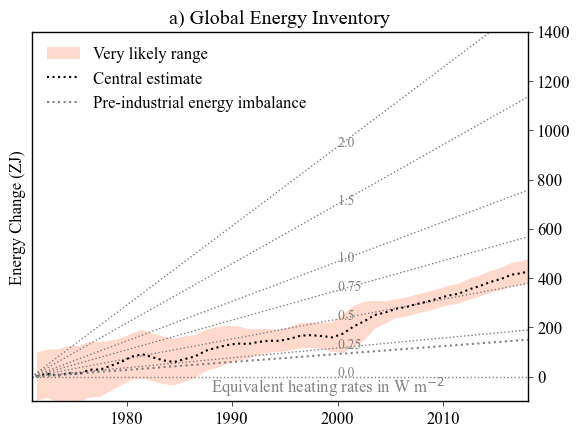

In [6]:
energy_dict = pd.read_csv('IPCCdata/energy_dict.csv')
WtoZJ = (5.1e14 * 31557600) / 1e21
e_yrs = energy_dict['yrs']
e_total = energy_dict['Total']
e_error = energy_dict['Total_error'] 
# convert 0.2 W m^-2 energy imbalance to Zetta Joules timeseries 
pi_total = (e_yrs - e_yrs[0]) * 0.2 * WtoZJ 

# plot the figure A
ax1 = plt.gca()
rate = np.array([0, 0.25, 0.5, 0.75, 1, 1.5, 2])
plotK(16.094376 * rate)
ax1.fill_between(e_yrs, e_total-e_error*NINETY_TO_ONESIGMA, e_total+e_error*NINETY_TO_ONESIGMA, 
                 alpha=alpha, facecolor='orangered', label='Very likely range')
ax1.plot(e_yrs, e_total, 'k', linewidth=LW, linestyle=':', label='Central estimate')
ax1.plot(e_yrs, pi_total, color='grey', linewidth=LW, linestyle=':', label='Pre-industrial energy imbalance')
ax1.legend(loc='upper left', frameon=False, fontsize=fontsize)
ax1.text(1988, -60, 'Equivalent heating rates in W m$^{-2}$', fontsize=fontsize, color='grey')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
ax1.yaxis.set_ticks_position('right')
ax1.tick_params(width=0.5)
plt.ylabel('Energy Change (ZJ)')
plt.title('a) Global Energy Inventory')

#### Panel B

In [7]:
ERF_dict = pd.read_csv('IPCCdata/ERF_dict.csv')

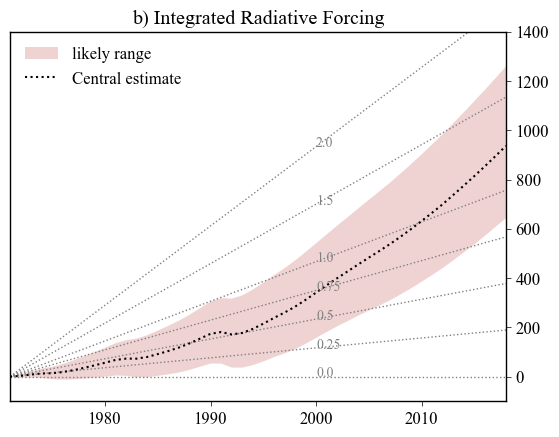

In [8]:
ax2 = plt.gca()

rate = np.array([0, 0.25, 0.5, 0.75, 1, 1.5, 2])
plotK(16.094376 * rate)
plt.fill_between(ERF_dict['yrs'], ERF_dict['p17'], ERF_dict['p83'], 
                 alpha=alpha, facecolor='firebrick', label='likely range')
plt.plot(ERF_dict['yrs'], ERF_dict['best'], color='k', linewidth=LW, linestyle=':', 
         label='Central estimate')
#plt.text(1984, -60, 'Equivalent heating rates in Wm$^{-2}$', fontsize=7.5, color='grey')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
ax2.yaxis.set_ticks_position('right')
ax2.tick_params(width=0.5)
plt.title('b) Integrated Radiative Forcing')
plt.legend(loc='upper left', frameon=False, fontsize=fontsize)


#### Panel C

In [9]:
Resp_dict = pd.read_csv('IPCCdata/Resp_dict.csv')

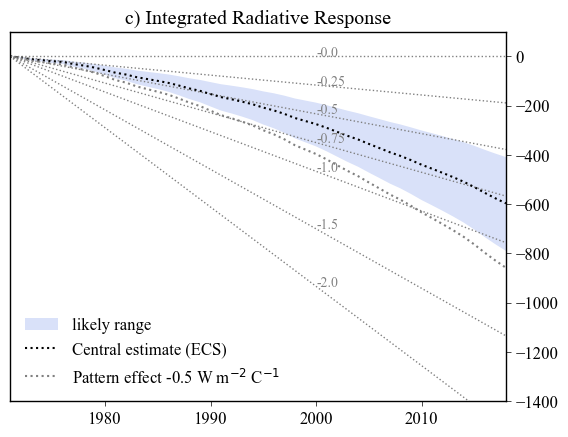

In [10]:
ax3 = plt.gca()
rate = np.array([0, 0.25, 0.5, 0.75, 1, 1.5, 2])
plotK(16.094376 * rate, invert=True)
plt.fill_between(Resp_dict['yrs'], Resp_dict['p17'], Resp_dict['p83'], 
                 alpha=alpha, facecolor='royalblue', label='likely range')
plt.plot(Resp_dict['yrs'], Resp_dict['p50'], color='k', linewidth=LW, linestyle=':', 
         label='Central estimate (ECS)')
plt.plot(Resp_dict['yrs'], Resp_dict['p50_0.5_pattern'], color='grey', linewidth=LW, linestyle=':', 
         label='Pattern effect -0.5 W m$^{-2}$ C$^{-1}$')
plt.xlim(xmin, xmax)
plt.ylim(-ymax, -ymin)
ax3.yaxis.set_ticks_position('right')
ax3.tick_params(width=0.5)
plt.title('c) Integrated Radiative Response')
plt.legend(loc='lower left', frameon=False, fontsize=fontsize)


#### Panel D

In [11]:
energy_dict2 = pd.read_csv('IPCCdata/energy_dict2.csv')

Text(0.5, 1.0, 'd) Energy Inventory Components')

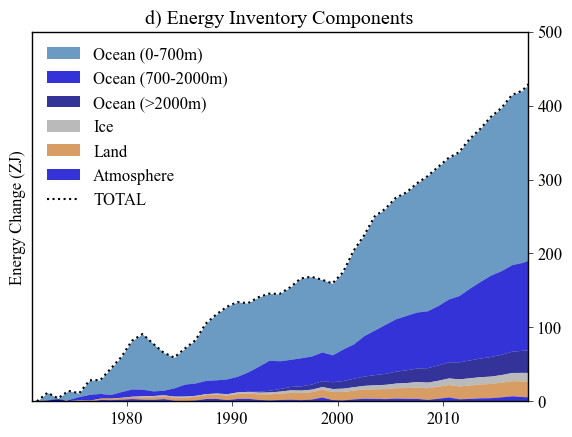

In [12]:

e_comps = ['atmosphere', 'land', 'cryosphere', 
           'ocean_>2000m', 'ocean_700-2000m', 'ocean_0-700m']
ax4 = plt.gca()


# Plot from total "downwards" for better legend/plot consistency
series = energy_dict2['Total']
e_comps.reverse()

for cc, comp in enumerate(e_comps):
    label = label_dict[comp]
    newseries = series - energy_dict2[comp]
    plt.fill_between(e_yrs, series, newseries, color=color_dict[comp], label=label, linewidth=0.0, alpha=0.8)
    series = newseries

plt.plot(e_yrs, e_total, 'k', linewidth=LW, linestyle=':', label='TOTAL')
ax4.legend(loc='upper left', frameon=False, fontsize=fontsize)
plt.xlim(xmin, xmax)
plt.ylim(0, hcmax)
ax4.yaxis.set_ticks_position('right')
ax4.tick_params(width=0.5)
plt.ylabel('Energy Change (ZJ)')
plt.title('d) Energy Inventory Components')


#### Panel E

In [13]:
ERF_dictJ = pd.read_csv('IPCCdata/ERF_dictJ.csv')

Text(0.5, 1.0, 'e) Radiative Forcing Components')

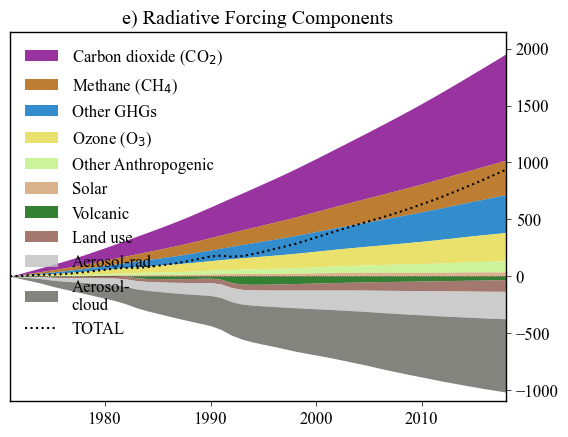

In [14]:
ax5 = plt.gca()

Jyrs = ERF_dictJ['yrs']
ERF_pos = ['solar', 'otherAnth', 'ozone', 'otherGHG', 'ch4', 'co2']
ERF_neg = ['volcanic', 'land_use', 'aerosol-radiation_interactions', 
           'aerosol-cloud_interactions']
ERF_pos.reverse()

# Compute total positive ERFs
Tpos = + ERF_dictJ['solar'] + ERF_dictJ['ozone'] + ERF_dictJ['otherAnth'] + ERF_dictJ['otherGHG'] + ERF_dictJ['ch4'] + ERF_dictJ['co2']
series = Tpos
for cc, comp in enumerate(ERF_pos):
    label = label_dict[comp]
    color = color_dict[comp]
    newseries = series - ERF_dictJ[comp]
    plt.fill_between(Jyrs, series, newseries, label=label, linewidth=0.0, color=color, alpha=0.8)
    series = newseries

series = np.zeros(len(Jyrs)) # Initialise empty time series for plotting
for cc, comp in enumerate(ERF_neg):
    label = label_dict[comp]
    color = color_dict[comp]
    newseries = series + ERF_dictJ[comp]
    plt.fill_between(Jyrs, series, newseries, label=label, linewidth=0.0, color=color, alpha=0.8)
    series = newseries


# plt.plot(Jyrs, ERF_dictJ['total'], 'k', linewidth=LW, linestyle=':', label='TOTAL') # Cross-check: gives same result
plt.plot(ERF_dict['yrs'], ERF_dict['best'], 'k', linewidth=LW, linestyle=':', label='TOTAL')
plt.legend(loc='upper left', ncol=1, frameon=False, fontsize=fontsize)
plt.xlim(xmin, xmax)
plt.ylim(-1100, 2150)
ax5.axhline(0, ls=':', lw=0.5, color='k')
ax5.yaxis.set_ticks_position('right')
ax5.tick_params(width=0.5)
plt.title('e) Radiative Forcing Components')


#### Panel F

In [15]:
budget_dict = pd.read_csv('IPCCdata/budget_dict.csv')

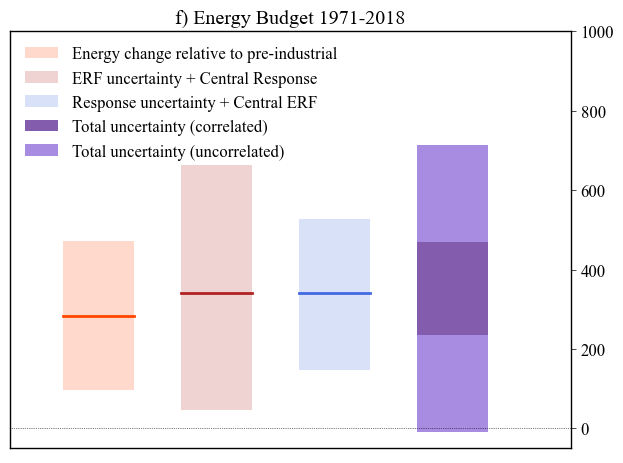

In [16]:
ax6 = plt.gca()
names = ['Energy change relative to pre-industrial',
         'ERF uncertainty + Central Response',
         'Response uncertainty + Central ERF'] 

mid, low_c, upp_c = budget_dict['Total uncertainty (correlated)']
mid, low_uc, upp_uc = budget_dict['Total uncertainty (uncorrelated)']

for nn, name in enumerate(names):
    xpts = [nn-0.3, nn+0.3]
    mid, low, upp = budget_dict[name]
    color = color_dict[name]
    plt.fill_between(xpts, low, upp, facecolor=color, alpha=alpha, 
                 label=name)
    plt.plot(xpts, [mid, mid], linewidth=2.0, color=color)

nn += 1
xpts = [nn-0.3, nn+0.3]
plt.fill_between(xpts, low_c, upp_c, facecolor='rebeccapurple', alpha=0.8, 
                 label='Total uncertainty (correlated)')
plt.fill_between(xpts, upp_c, upp_uc, facecolor='mediumpurple', alpha=0.8, 
                 label='Total uncertainty (uncorrelated)')
plt.fill_between(xpts, low_c, low_uc, facecolor='mediumpurple', alpha=0.8)

plt.legend(loc='upper left', frameon=False, fontsize=fontsize)
plt.xlim(-0.75, 4.0)
plt.title('f) Energy Budget 1971-2018')
plt.ylim(hcmin*2, hcmax*2)
ax6.axhline(0, ls=':', lw=0.5, color='k')
ax6.yaxis.set_ticks_position('right')
ax6.tick_params(width=0.5)
ax6.set_xticks([-100.])
plt.tight_layout(w_pad=0.1)


#### All

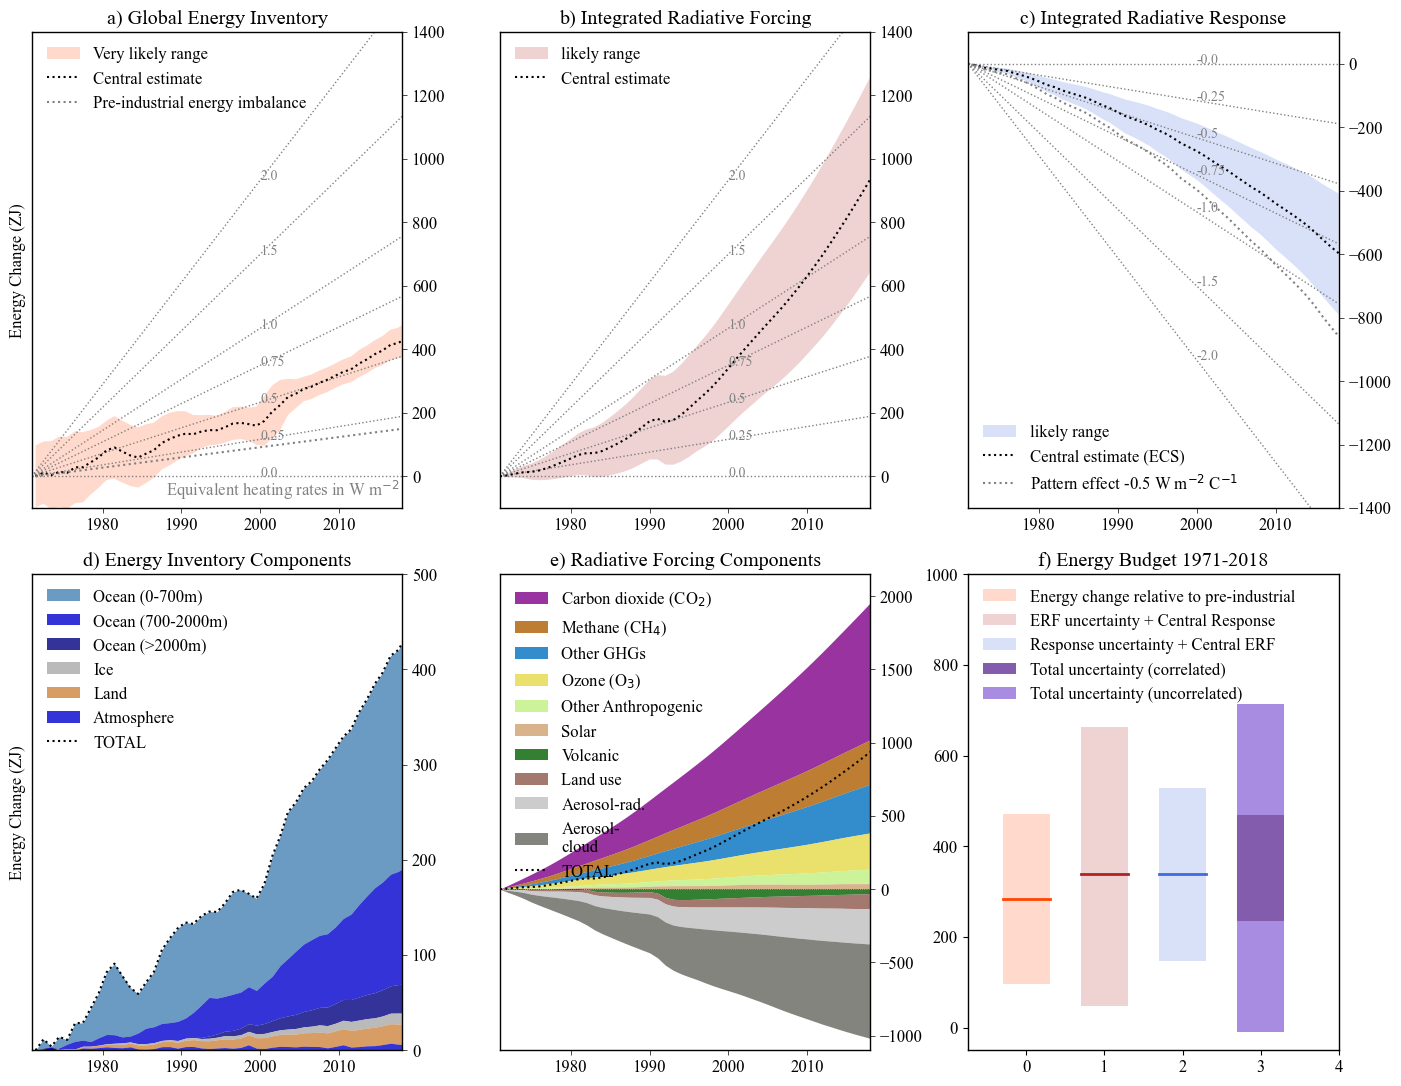

In [17]:
f = plt.gcf()
# Set dimensions to 18 x 14 cm.. = 7.086 x 4.724 inces
f.set_size_inches(14.172, 11.024)

#=========================================================
# Panel A = total Earth system warming with uncertainties
#=========================================================
ax1 = plt.subplot(2, 3, 1)
energy_dict = pd.read_csv('IPCCdata/energy_dict.csv')

WtoZJ = (5.1e14 * 31557600) / 1e21

e_yrs = energy_dict['yrs']
e_total = energy_dict['Total']
e_error = energy_dict['Total_error'] 
# convert 0.2 W m^-2 energy imbalance to Zetta Joules timeseries 
pi_total = (e_yrs - e_yrs[0]) * 0.2 * WtoZJ 

# plot the figure A
ax1 = plt.gca()

rate = np.array([0, 0.25, 0.5, 0.75, 1, 1.5, 2])
plotK(16.094376 * rate)
ax1.fill_between(e_yrs, e_total-e_error*NINETY_TO_ONESIGMA, e_total+e_error*NINETY_TO_ONESIGMA, 
                 alpha=alpha, facecolor='orangered', label='Very likely range')
ax1.plot(e_yrs, e_total, 'k', linewidth=LW, linestyle=':', label='Central estimate')
ax1.plot(e_yrs, pi_total, color='grey', linewidth=LW, linestyle=':', label='Pre-industrial energy imbalance')
ax1.legend(loc='upper left', frameon=False, fontsize=fontsize)
ax1.text(1988, -60, 'Equivalent heating rates in W m$^{-2}$', fontsize=fontsize, color='grey')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
ax1.yaxis.set_ticks_position('right')
ax1.tick_params(width=0.5)
plt.ylabel('Energy Change (ZJ)')
plt.title('a) Global Energy Inventory')

#===========================================
# Panel B = Effective Radiative Forcing.. 
#===========================================
ERF_dict = pd.read_csv('IPCCdata/ERF_dict.csv')
ax2 = plt.subplot(2, 3, 2)

rate = np.array([0, 0.25, 0.5, 0.75, 1, 1.5, 2])
plotK(16.094376 * rate)
plt.fill_between(ERF_dict['yrs'], ERF_dict['p17'], ERF_dict['p83'], 
                 alpha=alpha, facecolor='firebrick', label='likely range')
plt.plot(ERF_dict['yrs'], ERF_dict['best'], color='k', linewidth=LW, linestyle=':', 
         label='Central estimate')
#plt.text(1984, -60, 'Equivalent heating rates in Wm$^{-2}$', fontsize=7.5, color='grey')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
ax2.yaxis.set_ticks_position('right')
ax2.tick_params(width=0.5)
plt.title('b) Integrated Radiative Forcing')
plt.legend(loc='upper left', frameon=False, fontsize=fontsize)

#=======================================
# Panel C = Radiative Response 
#=======================================
Resp_dict = pd.read_csv('IPCCdata/Resp_dict.csv')
ax3 = plt.subplot(2, 3, 3)
rate = np.array([0, 0.25, 0.5, 0.75, 1, 1.5, 2])
plotK(16.094376 * rate, invert=True)
plt.fill_between(Resp_dict['yrs'], Resp_dict['p17'], Resp_dict['p83'], 
                 alpha=alpha, facecolor='royalblue', label='likely range')
plt.plot(Resp_dict['yrs'], Resp_dict['p50'], color='k', linewidth=LW, linestyle=':', 
         label='Central estimate (ECS)')
plt.plot(Resp_dict['yrs'], Resp_dict['p50_0.5_pattern'], color='grey', linewidth=LW, linestyle=':', 
         label='Pattern effect -0.5 W m$^{-2}$ C$^{-1}$')
plt.xlim(xmin, xmax)
plt.ylim(-ymax, -ymin)
ax3.yaxis.set_ticks_position('right')
ax3.tick_params(width=0.5)
plt.title('c) Integrated Radiative Response')
plt.legend(loc='lower left', frameon=False, fontsize=fontsize)

#============================================
# Panel D = Observed Energy Storage Change..
#============================================
energy_dict2 = pd.read_csv('IPCCdata/energy_dict2.csv')
e_comps = ['atmosphere', 'land', 'cryosphere', 
           'ocean_>2000m', 'ocean_700-2000m', 'ocean_0-700m']
ax4 = plt.subplot(2, 3, 4)

# Plot from total "downwards" for better legend/plot consistency
series = energy_dict2['Total']
e_comps.reverse()

for cc, comp in enumerate(e_comps):
    label = label_dict[comp]
    newseries = series - energy_dict2[comp]
    plt.fill_between(e_yrs, series, newseries, color=color_dict[comp], label=label, linewidth=0.0, alpha=0.8)
    series = newseries

plt.plot(e_yrs, e_total, 'k', linewidth=LW, linestyle=':', label='TOTAL')
ax4.legend(loc='upper left', frameon=False, fontsize=fontsize)
plt.xlim(xmin, xmax)
plt.ylim(0, hcmax)
ax4.yaxis.set_ticks_position('right')
ax4.tick_params(width=0.5)
plt.ylabel('Energy Change (ZJ)')
plt.title('d) Energy Inventory Components')

#=============================================
# Panel E = Components of Radiative Forcing
#=============================================
ERF_dictJ = pd.read_csv('IPCCdata/ERF_dictJ.csv')
ax5 = plt.subplot(2, 3, 5)

Jyrs = ERF_dictJ['yrs']
ERF_pos = ['solar', 'otherAnth', 'ozone', 'otherGHG', 'ch4', 'co2']
ERF_neg = ['volcanic', 'land_use', 'aerosol-radiation_interactions', 
           'aerosol-cloud_interactions']
ERF_pos.reverse()

# Compute total positive ERFs
Tpos = + ERF_dictJ['solar'] + ERF_dictJ['ozone'] + ERF_dictJ['otherAnth'] + ERF_dictJ['otherGHG'] + ERF_dictJ['ch4'] + ERF_dictJ['co2']
series = Tpos
for cc, comp in enumerate(ERF_pos):
    label = label_dict[comp]
    color = color_dict[comp]
    newseries = series - ERF_dictJ[comp]
    plt.fill_between(Jyrs, series, newseries, label=label, linewidth=0.0, color=color, alpha=0.8)
    series = newseries

series = np.zeros(len(Jyrs)) # Initialise empty time series for plotting
for cc, comp in enumerate(ERF_neg):
    label = label_dict[comp]
    color = color_dict[comp]
    newseries = series + ERF_dictJ[comp]
    plt.fill_between(Jyrs, series, newseries, label=label, linewidth=0.0, color=color, alpha=0.8)
    series = newseries


# plt.plot(Jyrs, ERF_dictJ['total'], 'k', linewidth=LW, linestyle=':', label='TOTAL') # Cross-check: gives same result
plt.plot(ERF_dict['yrs'], ERF_dict['best'], 'k', linewidth=LW, linestyle=':', label='TOTAL')
plt.legend(loc='upper left', ncol=1, frameon=False, fontsize=fontsize)
plt.xlim(xmin, xmax)
plt.ylim(-1100, 2150)
ax5.axhline(0, ls=':', lw=0.5, color='k')
ax5.yaxis.set_ticks_position('right')
ax5.tick_params(width=0.5)
plt.title('e) Radiative Forcing Components')

#=======================================================================
# Panel F = Energy Budget for period 1971-2015 (1971-2018 placeholder)
#=======================================================================
ax5 = plt.subplot(2, 3, 6)
names = ['Energy change relative to pre-industrial',
         'ERF uncertainty + Central Response',
         'Response uncertainty + Central ERF'] 

mid, low_c, upp_c = budget_dict['Total uncertainty (correlated)']
mid, low_uc, upp_uc = budget_dict['Total uncertainty (uncorrelated)']

for nn, name in enumerate(names):
    xpts = [nn-0.3, nn+0.3]
    mid, low, upp = budget_dict[name]
    color = color_dict[name]
    plt.fill_between(xpts, low, upp, facecolor=color, alpha=alpha, 
                 label=name)
    plt.plot(xpts, [mid, mid], linewidth=2.0, color=color)

nn += 1
xpts = [nn-0.3, nn+0.3]
plt.fill_between(xpts, low_c, upp_c, facecolor='rebeccapurple', alpha=0.8, 
                 label='Total uncertainty (correlated)')
plt.fill_between(xpts, upp_c, upp_uc, facecolor='mediumpurple', alpha=0.8, 
                 label='Total uncertainty (uncorrelated)')
plt.fill_between(xpts, low_c, low_uc, facecolor='mediumpurple', alpha=0.8)

plt.legend(loc='upper left', frameon=False, fontsize=fontsize)
plt.xlim(-0.75, 4.0)
plt.title('f) Energy Budget 1971-2018')
plt.ylim(hcmin*2, hcmax*2)
ax6.axhline(0, ls=':', lw=0.5, color='k')
ax6.yaxis.set_ticks_position('right')
ax6.tick_params(width=0.5)
ax6.set_xticks([-100.])
plt.tight_layout(w_pad=0.1)
plt.savefig('IPCCdata/sixpanel.pdf',dpi=300,format='pdf')